# Neural Network with Pre-Selection


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utilities import Data, Consts
import data_pipeline as dp
import Lb1520cuts

## Pre-Selection
We start by implementing the simulated pre-selection cuts. They are different for the simulated and real data. The cut strings have been made by Dan and are not very Python friendly so the function below just finds all the features that are needed and fetches them. It then turns the string into a format that can just be fed into the dataframe.

In [53]:
s = "(((( Lb_M01_Subst0_p2K <1019.461-12)|( Lb_M01_Subst0_p2K >1019.461+12))&((((((243716.98437715+ p_P **2)**0.5+ K_PE + L2_PE )**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2000)&(((((243716.98437715+ p_P **2)**0.5+ K_PE + L1_PE )**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2000))&((((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(0.26112103+ L2_P **2)**0.5)**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2320)&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&(((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(11163.69140675+ L1_P **2)**0.5)**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2320)&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0)))))&(( Lb_M23 >3178.05)|( Lb_M23 <3000))&((((((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)>1865+20)|(((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&((((((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)>3097+35)|(((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)<3097-35))&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))&((((((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)>1865+20)|(((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID >0)&( p_ID >0))|(( L2_ID <0)&( p_ID <0))))|((( L1_ID >0)&( p_ID >0))|(( L1_ID <0)&( p_ID <0))))&((( p_PX * L1_PX + p_PY * L1_PY + p_PZ * L1_PZ )/( p_P * L1_P )<np.cos(1e-3))&(( p_PX * L2_PX + p_PY * L2_PY + p_PZ * L2_PZ )/( p_P * L2_P )<np.cos(1e-3))&(( K_PX * L1_PX + K_PY * L1_PY + K_PZ * L1_PZ )/( K_P * L1_P )<np.cos(1e-3))&(( K_PX * L2_PX + K_PY * L2_PY + K_PZ * L2_PZ )/( K_P * L2_P )<np.cos(1e-3)))&(( p_PX * K_PX + p_PY * K_PY + p_PZ * K_PZ )/( p_P * K_P )<np.cos(1e-3)))&( L1_L0MuonDecision_TOS )&(( Lb_Hlt1TrackMVADecision_TOS )|( Lb_Hlt1TrackMuonDecision_TOS ))&( Lb_Hlt2Topo2BodyDecision_TOS | Lb_Hlt2Topo3BodyDecision_TOS | Lb_Hlt2Topo4BodyDecision_TOS | Lb_Hlt2TopoMu2BodyDecision_TOS | Lb_Hlt2TopoMu3BodyDecision_TOS | Lb_Hlt2TopoMu4BodyDecision_TOS )&(( LStar_M >1448)&( LStar_M <1591))&(( Lb_BKGCAT ==10)|( Lb_BKGCAT ==50)))"
r = "((( Lb_M01_Subst0_p2K <1019.461-12)|( Lb_M01_Subst0_p2K >1019.461+12))&((((((243716.98437715+ p_P **2)**0.5+ K_PE + L2_PE )**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2000)&(((((243716.98437715+ p_P **2)**0.5+ K_PE + L1_PE )**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2000))&((((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(0.26112103+ L2_P **2)**0.5)**2-( p_PX + K_PX + L2_PX )**2-( p_PY + K_PY + L2_PY )**2-( p_PZ + K_PZ + L2_PZ )**2)**0.5)>2320)&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&(((((((880354.49999197+ p_P **2)**0.5+(243716.98437715+ K_P **2)**0.5+(11163.69140675+ L1_P **2)**0.5)**2-( p_PX + K_PX + L1_PX )**2-( p_PY + K_PY + L1_PY )**2-( p_PZ + K_PZ + L1_PZ )**2)**0.5)>2320)&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0)))))&(( Lb_M23 >3178.05)|( Lb_M23 <3000))&((((((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)>1865+20)|(((( K_PE +(19479.95517577+ L2_P **2)**0.5)**2-( K_PX + L2_PX )**2-( K_PY + L2_PY )**2-( K_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))|((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))&((((((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)>3097+35)|(((((11163.69140675+ K_P **2)**0.5+ L1_PE )**2-( K_PX + L1_PX )**2-( K_PY + L1_PY )**2-( K_PZ + L1_PZ )**2)**0.5)<3097-35))&((( L1_ID <0)&( p_ID >0))|(( L1_ID >0)&( p_ID <0))))|((( L2_ID <0)&( p_ID >0))|(( L2_ID >0)&( p_ID <0))))&((((((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)>1865+20)|(((((243716.98437715+ p_P **2)**0.5+(19479.95517577+ L2_P **2)**0.5)**2-( p_PX + L2_PX )**2-( p_PY + L2_PY )**2-( p_PZ + L2_PZ )**2)**0.5)<1865-20))&((( L2_ID >0)&( p_ID >0))|(( L2_ID <0)&( p_ID <0))))|((( L1_ID >0)&( p_ID >0))|(( L1_ID <0)&( p_ID <0))))&((( p_PX * L1_PX + p_PY * L1_PY + p_PZ * L1_PZ )/( p_P * L1_P )<np.cos(1e-3))&(( p_PX * L2_PX + p_PY * L2_PY + p_PZ * L2_PZ )/( p_P * L2_P )<np.cos(1e-3))&(( K_PX * L1_PX + K_PY * L1_PY + K_PZ * L1_PZ )/( K_P * L1_P )<np.cos(1e-3))&(( K_PX * L2_PX + K_PY * L2_PY + K_PZ * L2_PZ )/( K_P * L2_P )<np.cos(1e-3)))&(( p_PX * K_PX + p_PY * K_PY + p_PZ * K_PZ )/( p_P * K_P )<np.cos(1e-3)))"
# The pre-selection strings

def get_required_features(selection, df_prefix='df'):
    required_features = []
    b = False
    e = False
    begin, end = 0, 0
    s = ''
    
    for i, char in enumerate(selection):
        s += char
        if char == ' ' and not b:
            # Runs is b is False
            s = s[:-1]
            s += f"{df_prefix}['"
            begin = i
            b = True 
            # We now have a begin position
        elif char == ' ' and b:
            # Only runs when we have a begin position
            s = s[:-1]
            s += "']"
            end = i
            # Determine end position
            e = True
            # We now have an ending position as well
        if b and e:
            # We have both a begin and end point
            required_features.append(selection[begin+1:end])
            b, e = False, False
    # Remove all duplicates
    required_features = list(dict.fromkeys(required_features))
    return required_features, s

In [65]:
simulated_fts, sdfstring = get_required_features(s, 'sf')
real_fts, rdfstring = get_required_features(r, 'rf')
# Find the features needed from pre-selection string

real, sim = Data(*Consts().get_real_tuple()), Data(*Consts().get_simulated_tuple())
rf, sf = real.fetch_features(real_fts), sim.fetch_features(simulated_fts)
# Gather all those features, remember we get eventNumber returned as an index

In [66]:
pre_selection_rf = rf[eval(rdfstring)]
pre_selection_sf = sf[eval(sdfstring)]

rf.shape, sf.shape, pre_selection_rf.shape, pre_selection_sf.shape

((132974, 24), (21727, 35), (31593, 24), (4402, 35))

The pre-selections really did cut our data down alot! We removed 76.2% of the real data and 79.9% of the simulated data. Oh no, we are going to need more data now.

## Reading in Data

In [2]:
particle_features = ['Theta', 'MINIP', 'PX', 'PY', 'PZ', 'PT']
particles = ['L1', 'L2', 'p', 'K']
feats = [particle + "_" + ft for ft in particle_features for particle in particles]
feats += ['Lb_DTF_PV_chi2']

df = dp.get_combined_data(feats, random_shuffle=True, random_state=0)
# I will always use a random state of zero for reproducibility of the notebook

Fetching features
[====================] 100% Complete
Features requested successfully


## Feature Engineering
Now we will make some new features out of those that we have already requested. This could significantly improve network performance. Essentially it does the job of the network for it. For example we expect some angles and differences between angles to be useful.

Note that we do not need to review these distributions since these have already been done in a previous notebook. Essentially they all look somewhat similar, maybe this is bad for performance but at least it shows that the simulated data is reproducing the real data well. 

In [3]:
for particle in particles:
    df[particle + "_P"] = np.sqrt(df[particle + "_PT"]**2 + df[particle + "_PZ"]**2)
    df[particle + '_alpha'] = np.arcsin(df[particle + '_PT']/df[particle + '_P'])
    df[particle + '_normPT'] = df[particle + "_PT"]/df[particle + "_P"]
    
combinations = np.array([
    ['L1', 'L2'],
    ['L1', 'p'],
    ['L1', 'K'],
    ['L2', 'p'],
    ['L2', 'K'],
    ['p', 'K']
])

for combo in combinations:
    namePT = f"{combo[0]}_minus_PT_{combo[1]}"
    nameALPHA = f"{combo[0]}_minus_alpha_{combo[1]}"
    df[namePT] = df[combo[0] + "_normPT"] - df[combo[1] + "_normPT"]
    df[nameALPHA] = df[combo[0] + "_alpha"] - df[combo[1] + "_alpha"]

## Model Design and Training

In [4]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = dp.prepare_data(df, train_frac=0.6, val_frac=0.2, test_frac=0.2, random_state=1)
# Get the training, validation and test data, also inspect it for proof-of-concept

X_train.shape, y_train.shape, X_val.shape, X_test.shape

((92819, 49), (92819,), (30941, 49), (30941, 49))

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import callbacks

early_stopping = keras.callbacks.EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=True)
lr_schedule = callbacks.ReduceLROnPlateau(
    patience=5,
    factor=0.2,
    min_lr=0.001,
)

m = keras.Sequential()
m.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.Dropout(0.2))
m.add(layers.BatchNormalization())
m.add(layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.Dropout(0.2))
m.add(layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.BatchNormalization())
m.add(layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)))
m.add(layers.Dense(1, activation='sigmoid'))
m.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy', 'AUC'])
#m_history = m.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_schedule])
# Do not train the model again just load it in
#m = tf.keras.models.load_model('models/v2.3')
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3200      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

2022-02-08 10:17:34.356788: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-08 10:17:34.362116: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Write the fitting history with pickle
import pickle

#with open('train_history/v2.3_histDict', 'wb') as file_pi:
#    pickle.dump(m_history.history, file_pi)
    
# Read in using 
history = pickle.load(open('train_history/v2.3_histDict', "rb"))

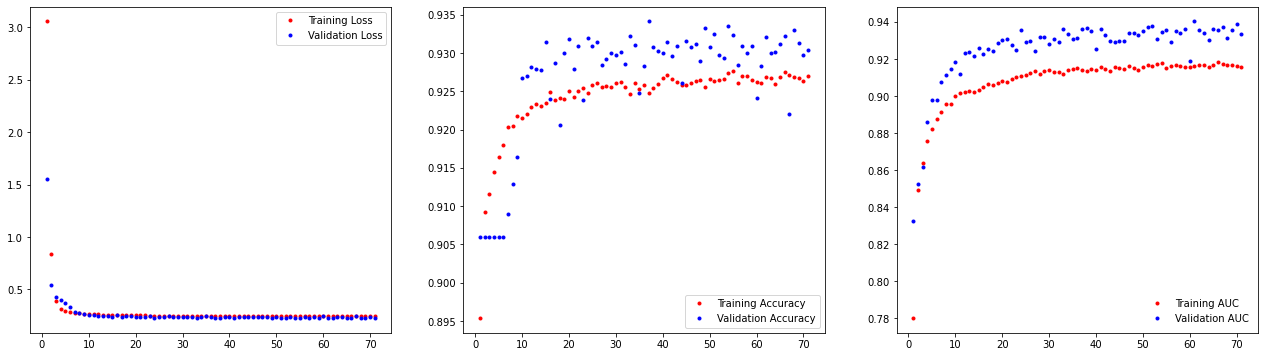

In [8]:
dp.plot_history_curves(history, 71)

In [ ]:
m.save('models/v2.3')

2022-02-07 17:47:51.851591: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/v2.3/assets
